## Dataset Clientes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from datetime import datetime

### PARTE A - PREPARAÇÃO E ANÁLISE EXPLORATÓRIA

In [2]:
# Carregar dataset
df_clientes = pd.read_csv ('clientes.csv', sep=',', encoding='utf-8')


In [3]:
df_clientes.head()

,cliente_id,idade,genero,nacionalidade,distrito_residencia,cliente_desde,tipo_cliente,cliente_habitual
0,C002216,46,F,PT,Aveiro,2023-04-02,Restaurante,Não
1,C002583,41,F,PT,Aveiro,2024-08-30,Hotel,Não
2,C001663,18,M,ES,NaN,2023-08-31,Restaurante,Não
3,C003028,49,M,PT,Porto,2024-08-30,Restaurante,Não
4,C004344,58,F,ES,NaN,2023-03-31,Restaurante,Não


In [4]:
df_clientes.tail()

,cliente_id,idade,genero,nacionalidade,distrito_residencia,cliente_desde,tipo_cliente,cliente_habitual
7995,C005227,35,F,PT,Outro,2024-04-15,Restaurante,Não
7996,C005391,30,F,PT,Viseu,2024-03-03,Restaurante,Não
7997,C000861,45,M,PT,Outro,2024-03-05,Hotel,Não
7998,C007604,28,F,DE,NaN,2024-01-28,Restaurante,Sim
7999,C007271,18,M,UK,NaN,2023-05-30,Ambos,Sim


In [5]:
# fazer cópia do df
df_clintes_original = df_clientes.copy()

In [6]:
# dimensões
print(f"Linhas: {df_clientes.shape[0]} Colunas: {df_clientes.shape[1]}")

Linhas: 8000 Colunas: 8


In [7]:
df_clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   cliente_id           8000 non-null   object
 1   idade                8000 non-null   int64 
 2   genero               8000 non-null   object
 3   nacionalidade        8000 non-null   object
 4   distrito_residencia  4078 non-null   object
 5   cliente_desde        8000 non-null   object
 6   tipo_cliente         8000 non-null   object
 7   cliente_habitual     8000 non-null   object
dtypes: int64(1), object(7)
memory usage: 500.1+ KB


In [8]:
# alterar cliente_desde de string para data
df_clientes['cliente_desde'] = pd.to_datetime(df_clientes['cliente_desde'])
# tipos de dados
df_clientes.dtypes

cliente_id                     object
idade                           int64
genero                         object
nacionalidade                  object
distrito_residencia            object
cliente_desde          datetime64[ns]
tipo_cliente                   object
cliente_habitual               object
dtype: object

In [9]:
df_clientes.describe()

,idade,cliente_desde
count,8000.000000,8000
mean,41.917000,2023-12-31 11:26:20.400000256
min,18.000000,2023-01-01 00:00:00
25%,31.000000,2023-07-01 00:00:00
50%,41.000000,2023-12-29 00:00:00
75%,52.000000,2024-07-04 00:00:00
max,80.000000,2024-12-31 00:00:00
std,14.970492,NaN


In [10]:
# valores únicos
for col in df_clientes.columns:
    n_unique = df_clientes[col].nunique()
    print(f"{col}: {n_unique} valores")

cliente_id: 8000 valores
idade: 63 valores
genero: 2 valores
nacionalidade: 6 valores
distrito_residencia: 8 valores
cliente_desde: 731 valores
tipo_cliente: 3 valores
cliente_habitual: 2 valores


In [11]:
# 1) Missing values (contagem por coluna)
missing = df_clientes.isna().sum().sort_values(ascending=False)
display(missing.to_frame("n_missing"))



,n_missing
distrito_residencia,3922
cliente_id,0
genero,0
idade,0
nacionalidade,0
cliente_desde,0
tipo_cliente,0
cliente_habitual,0


In [12]:
# 1) Duplicados exatos (todas as colunas iguais)
duplicados_exatos = df_clientes.duplicated().sum()
print(f"Número de linhas duplicadas (exatamente iguais): {duplicados_exatos}")

# 2) Duplicados com base apenas no cliente_id (devia ser único)
duplicados_id = df_clientes.duplicated(subset=["cliente_id"]).sum()
print(f"Número de cliente_id repetidos: {duplicados_id}")


Número de linhas duplicadas (exatamente iguais): 0
Número de cliente_id repetidos: 0


In [13]:
# Clientes estrangeiros com distrito preenchido (não deveria haver)
estrangeiros_com_distrito = df_clientes[
    (df_clientes["nacionalidade"] != "PT") &
    (df_clientes["distrito_residencia"].notna())
]
print("Estrangeiros com distrito preenchido:", len(estrangeiros_com_distrito))

# Portugueses sem distrito (poderia indicar missing)
pt_sem_distrito = df_clientes[
    (df_clientes["nacionalidade"] == "PT") &
    (df_clientes["distrito_residencia"].isna())
]
print("Portugueses sem distrito:", len(pt_sem_distrito))


Estrangeiros com distrito preenchido: 0
Portugueses sem distrito: 0


In [14]:

# Se não for PT, distrito passa a "Estrangeiro"
df_clientes.loc[df_clientes["nacionalidade"] != "PT", "distrito_residencia"] = "Estrangeiro"

# Se for PT e distrito estiver vazio, podemos marcar como "Desconhecido"
df_clientes.loc[
    (df_clientes["nacionalidade"] == "PT") & (df_clientes["distrito_residencia"].isna()),
    "distrito_residencia"
] = "Desconhecido"

# Normalizar valores de texto (strip e title)
df_clientes["distrito_residencia"] = df_clientes["distrito_residencia"].astype(str).str.strip().str.title()


In [15]:
df_clientes['distrito_residencia'].unique()



array(['Aveiro', 'Estrangeiro', 'Porto', 'Braga', 'Faro', 'Lisboa',
       'Outro', 'Coimbra', 'Viseu'], dtype=object)

In [16]:
# 1) Missing values (contagem por coluna)
missing = df_clientes.isna().sum().sort_values(ascending=False)
display(missing.to_frame("n_missing"))

,n_missing
cliente_id,0
idade,0
genero,0
nacionalidade,0
distrito_residencia,0
cliente_desde,0
tipo_cliente,0
cliente_habitual,0


### não há mais valores em falta no distrito. os clientes que não tinham valor preenchido eram clientes estrangeiros e esse campo reflecte agora a sua situação. 

In [17]:
# Clirar colunas de tempo (ano, mês, dia)

df_clientes["ano_primeira_interacao"] = df_clientes["cliente_desde"].dt.year
df_clientes["mes_primeira_interacao"] = df_clientes["cliente_desde"].dt.month
df_clientes["dia_primeira_interacao"] = df_clientes["cliente_desde"].dt.day


In [18]:
# Criar coluna booleana de cliente habitual

df_clientes["cliente_habitual_bool"] = df_clientes["cliente_habitual"].map({"Sim": True, "Não": False})


In [19]:
# coluna com tempo de cliente desde primeira vez

hoje = pd.Timestamp.today().normalize()
df_clientes["anos_desde_primeira_interacao"] = (hoje - df_clientes["cliente_desde"]).dt.days / 365.25
df_clientes["anos_desde_primeira_interacao"] = df_clientes["anos_desde_primeira_interacao"].round(1)


In [20]:
df_clientes.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   cliente_id                     8000 non-null   object        
 1   idade                          8000 non-null   int64         
 2   genero                         8000 non-null   object        
 3   nacionalidade                  8000 non-null   object        
 4   distrito_residencia            8000 non-null   object        
 5   cliente_desde                  8000 non-null   datetime64[ns]
 6   tipo_cliente                   8000 non-null   object        
 7   cliente_habitual               8000 non-null   object        
 8   ano_primeira_interacao         8000 non-null   int32         
 9   mes_primeira_interacao         8000 non-null   int32         
 10  dia_primeira_interacao         8000 non-null   int32         
 11  cliente_habitual_

In [21]:
# criar faixa etária de cliente

bins = [0, 17, 24, 34, 44, 54, 64, 200]
labels = ["<=17","18-24","25-34","35-44","45-54","55-64","65+"]

df_clientes["faixa_etaria"] = pd.cut(
    df_clientes["idade"], bins=bins, labels=labels, include_lowest=True
)

display(df_clientes["faixa_etaria"].value_counts(dropna=False))


faixa_etaria
35-44    1920
45-54    1727
25-34    1531
18-24    1152
55-64    1052
65+       618
<=17        0
Name: count, dtype: int64

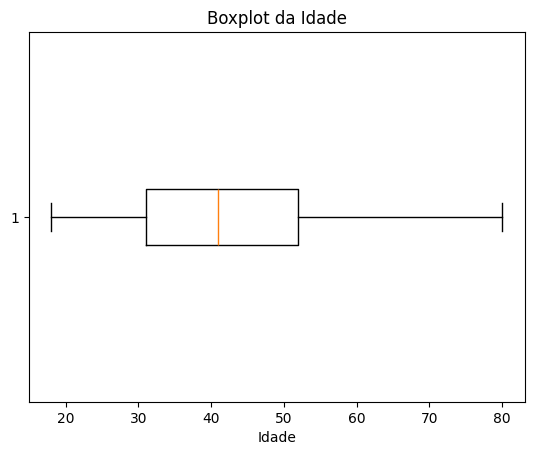

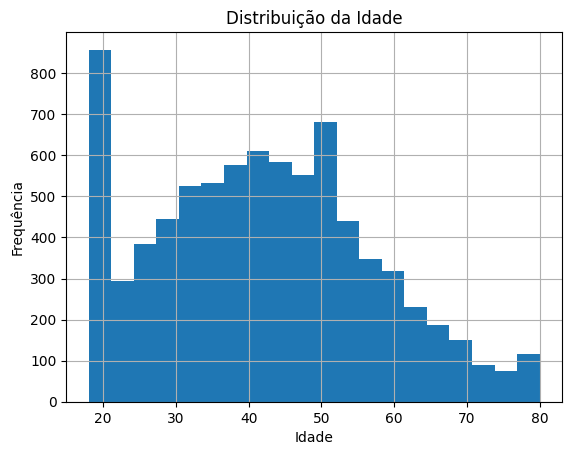

In [22]:
# verificar outliers - unica variável com efeitos será idade 
# validar boxplot

plt.boxplot(df_clientes["idade"], vert=False)
plt.title("Boxplot da Idade")
plt.xlabel("Idade")
plt.show()

df_clientes["idade"].hist(bins=20)
plt.title("Distribuição da Idade")
plt.xlabel("Idade")
plt.ylabel("Frequência")
plt.show()


In [23]:
# Quartis e Outliers: minimo, máximo, Q1-3, IQR, Limite inferior e superior, outliers, % de outliers
print("\nQUARTIS E PERCENTIS:")
print("-" * 40)
print(f"1º Quartil (25%): {df_clientes['idade'].quantile(0.25):.2f}")
print(f"3º Quartil (75%): {df_clientes['idade'].quantile(0.75):.2f}")

# Intervalo interquartil (IQR)
q1 = df_clientes['idade'].quantile(0.25)
q3 = df_clientes['idade'].quantile(0.75)
iqr = q3 - q1
print(f"\nIQR (Q3-Q1): €{iqr:.2f}")

# Regra comum: outliers são valores fora de [Q1 - 1.5*IQR, Q3 + 1.5*IQR]
limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

print(f"\nLIMITES PARA OUTLIERS:")
print(f"Inferior: €{limite_inferior:.2f}")
print(f"Superior: €{limite_superior:.2f}")

# Contar outliers
outliers = df_clientes[(df_clientes['idade'] < limite_inferior) | (df_clientes['idade'] > limite_superior)]
print(f"\nOutliers encontrados: {len(outliers)} ({len(outliers)/len(df_clientes)*100:.1f}%)")


QUARTIS E PERCENTIS:
----------------------------------------
1º Quartil (25%): 31.00
3º Quartil (75%): 52.00

IQR (Q3-Q1): €21.00

LIMITES PARA OUTLIERS:
Inferior: €-0.50
Superior: €83.50

Outliers encontrados: 0 (0.0%)


# Não tem outliers